# **Titanic Data Science Solutions** 
problem - Knowing from a training set of samples listing passengers who survived or did not survive the Titanic disaster, can our model determine based on a given test dataset not containing the survival information, if these passengers in the test dataset survived or not.


FIREST LET IMPORT ALL THE IMPORT LIBARIES AND DATASET.

In [152]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [153]:

# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)



# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the curren

Python version: 3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) 
[GCC 7.3.0]
pandas version: 1.0.3
matplotlib version: 3.2.1
NumPy version: 1.18.1
SciPy version: 1.4.1
IPython version: 7.13.0
scikit-learn version: 0.22.2.post1
-------------------------
titanic



In [154]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import pandas as pd

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [155]:
#import data from file: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
data_raw = pd.read_csv('/kaggle/input/titanic/train.csv')


#a dataset should be broken into 3 splits: train, test, and (final) validation
#the test file provided is the validation file for competition submission
#we will split the train set into train and test data in future sections
data_val  = pd.read_csv('/kaggle/input/titanic/test.csv')


#to play with our data we'll create a copy
#remember python assignment or equal passes by reference vs values, so we use the copy function: https://stackoverflow.com/questions/46327494/python-pandas-dataframe-copydeep-false-vs-copydeep-true-vs
data1 = data_raw.copy(deep = True)

#however passing by reference is convenient, because we can clean both datasets at once data1= train, data_val = test
data_cleaner = [data1, data_val]


#preview data
print (data_raw.info()) #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html
#data_raw.head() #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html
#data_raw.tail() #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.tail.html
data_raw.sample(10) #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
420,421,0,3,"Gheorgheff, Mr. Stanio",male,NaN,0,0,349254,7.8958,NaN,C
588,589,0,3,"Gilinski, Mr. Eliezer",male,22.0,0,0,14973,8.0500,NaN,S
595,596,0,3,"Van Impe, Mr. Jean Baptiste",male,36.0,1,1,345773,24.1500,NaN,S
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.0,0,2,363291,20.5250,NaN,S
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0000,B96 B98,S
458,459,1,2,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.5000,NaN,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
221,222,0,2,"Bracken, Mr. James H",male,27.0,0,0,220367,13.0000,NaN,S


Checking the null values

In [156]:
print(data1.isnull().sum())
print('//////////')
print(data_val.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
//////////
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Analyze the data by describe

In [157]:
data_raw.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [158]:
###COMPLETING: complete or delete missing values in train and test/validation dataset
for dataset in data_cleaner:    
    #complete missing age with median
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    #complete embarked with mode
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    #complete missing fare with median
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    


filled the null values with mode and median...
cabin ,ticket , passeid does not create any impact so drop them

In [159]:
#delete the cabin feature/column and others previously stated to exclude in train dataset
drop_column = ['PassengerId','Cabin', 'Ticket']
data1.drop(drop_column, axis=1, inplace = True)

print(data1.isnull().sum())
print("-"*10)
print(data_val.isnull().sum())


Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [160]:
###CREATE: Feature Engineering for train and test/validation dataset
for dataset in data_cleaner:    
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1
    dataset['Title'] = dataset['Name'].apply(lambda x : x.split(',')[1].split('.')[0])
    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)



In [161]:
for dataset in data_cleaner:  
    tf= dataset['Title'].value_counts()<10
    dataset['Title']= dataset['Title'].apply(lambda x: 'misc' if tf.loc[x] == True else x )
    dataset['Title'].value_counts()

AGAIN CHECKING THE MISSING VALUES AND DATA TYPE, AS WE CAN SEE WE ALREADY GOT RID OF MISSING VALUES

In [162]:
data1.info()
data_val.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Name        891 non-null    object  
 3   Sex         891 non-null    object  
 4   Age         891 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Fare        891 non-null    float64 
 8   Embarked    891 non-null    object  
 9   FamilySize  891 non-null    int64   
 10  Title       891 non-null    object  
 11  IsAlone     891 non-null    int64   
 12  FareBin     891 non-null    category
 13  AgeBin      891 non-null    category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   

**Convert Formats**
We will convert categorical data to dummy variables for mathematical analysis. There are multiple ways to encode categorical variables; we will use the sklearn and pandas functions.

In this step, we will also define our x (independent/features/explanatory/predictor/etc.) and y (dependent/target/outcome/response/etc.) variables for data modeling.



In [163]:
data1.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title,IsAlone,FareBin,AgeBin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Mr,0,"(-0.001, 7.91]","(16.0, 32.0]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Mrs,0,"(31.0, 512.329]","(32.0, 48.0]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,Miss,1,"(7.91, 14.454]","(16.0, 32.0]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,Mrs,0,"(31.0, 512.329]","(32.0, 48.0]"
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,Mr,1,"(7.91, 14.454]","(32.0, 48.0]"


# Analyze by visualizing data

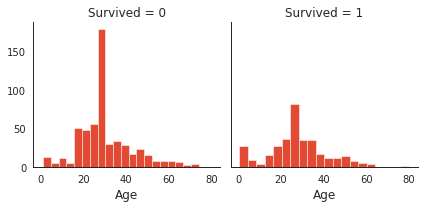

In [165]:
g = sns.FacetGrid(data1, col='Survived')
g.map(plt.hist, 'Age', bins=20)

**OBSERVATIONS**
* Infants (Age <=4) had high survival rate.
* Oldest passengers (Age = 80) survived.
* Large number of 15-25 year olds did not survive.
* Most passengers are in 15-35 age range.

Correlating numerical and ordinal features

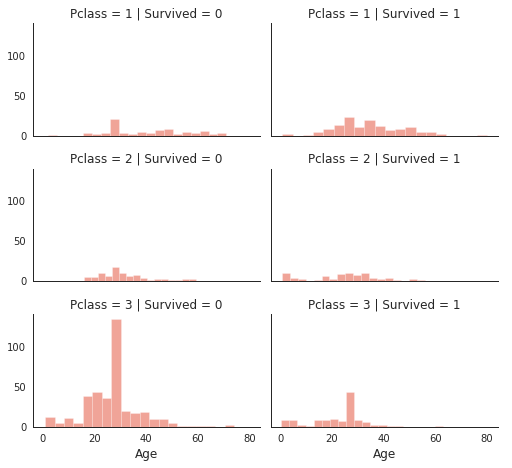

In [167]:
# grid = sns.FacetGrid(data1, col='Pclass', hue='Survived')
grid = sns.FacetGrid(data1, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

Correlating categorical and numerical features


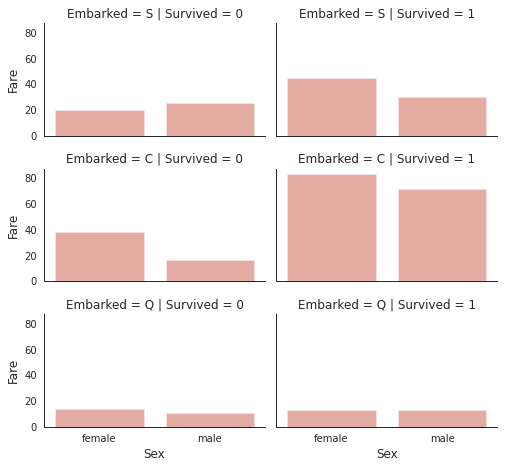

In [168]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(data1, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

**OBSERVATION**
* Higher fare paying passengers had better survival. 
* Port of embarkation correlates with survival rates.

**DATA WRANGLE**

In [134]:
for dataset in data_cleaner:
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)
data1.head(2)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title,IsAlone,FareBin,AgeBin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Mr,0,"(-0.001, 7.91]","(16.0, 32.0]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Mrs,0,"(31.0, 512.329]","(32.0, 48.0]"


DOING THE LABEL ENCODING FOR AGE AND FARE

In [135]:
for dataset in data_cleaner:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

for dataset in data_cleaner: 
    dataset.drop('Name',axis=1, inplace = True)
    dataset.drop('AgeBin',axis=1, inplace = True)
    dataset.drop('FareBin',axis=1, inplace = True)



In [136]:
data1.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title,IsAlone
0,0,3,male,1.0,1,0,0,S,2,Mr,0
1,1,1,female,2.0,1,0,3,C,2,Mrs,0


In [137]:
data_val.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,IsAlone
0,892,3,male,2.0,0,0,330911,0,NaN,Q,1,Mr,1
1,893,3,female,2.0,1,0,363272,0,NaN,S,2,Mrs,0


PERFORMING ONE HOT ENCODING FOR CATEGORIAL VARIABLES

In [138]:
data1_x = ['Sex','Embarked', 'Title']
data1_dummy = pd.get_dummies(data1[data1_x])
data_val_dummy=pd.get_dummies(data_val[data1_x])
data1_dummy.head(2)

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Title_misc
0,0,1,0,0,1,0,0,1,0,0
1,1,0,1,0,0,0,0,0,1,0


In [139]:
data1= pd.concat([data1,data1_dummy],axis=1 )
data_val=pd.concat([data_val,data_val_dummy],axis =1)
data_cleaner = [data1,data_val]
for dataset in data_cleaner:
    dataset.drop('Sex',axis= 1,inplace = True)
    dataset.drop('Embarked',axis= 1,inplace = True)
    dataset.drop('Title',axis= 1,inplace = True)
    
data_val.drop('Ticket',axis=1,inplace = True)
data_val.drop('Cabin',axis= 1,inplace = True)

THUS, WE ARE DONE WITH CLEANING, WRANGGLING,PREPORCESSING AND FEATURE EXTRACTION. lETS NOW TRAIN OUR MODEL

In [140]:
data1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Title_misc
0,0,3,1.0,1,0,0,2,0,0,1,0,0,1,0,0,1,0,0
1,1,1,2.0,1,0,3,2,0,1,0,1,0,0,0,0,0,1,0
2,1,3,1.0,0,0,1,1,1,1,0,0,0,1,0,1,0,0,0
3,1,1,2.0,1,0,3,2,0,1,0,0,0,1,0,0,0,1,0
4,0,3,2.0,0,0,1,1,1,0,1,0,0,1,0,0,1,0,0


WE HAVE CREATED SOME USEFUL FEATURES AND REMOVED THE UNWANTED FEATURE. WE ARE READY FOR MODEL TRAINING

******Modeling**********************

In [141]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [142]:
train_df =data1
test_df=data_val
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 17), (891,), (418, 17))

In [143]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         418 non-null    int64  
 1   Age            418 non-null    float64
 2   SibSp          418 non-null    int64  
 3   Parch          418 non-null    int64  
 4   Fare           418 non-null    int64  
 5   FamilySize     418 non-null    int64  
 6   IsAlone        418 non-null    int64  
 7   Sex_female     418 non-null    uint8  
 8   Sex_male       418 non-null    uint8  
 9   Embarked_C     418 non-null    uint8  
 10  Embarked_Q     418 non-null    uint8  
 11  Embarked_S     418 non-null    uint8  
 12  Title_ Master  418 non-null    uint8  
 13  Title_ Miss    418 non-null    uint8  
 14  Title_ Mr      418 non-null    uint8  
 15  Title_ Mrs     418 non-null    uint8  
 16  Title_misc     418 non-null    uint8  
dtypes: float64(1), int64(6), uint8(10)
memory usage: 27.1 

ACCURACY MATRIX- Classification Accuracy is what we usually mean, when we use the term accuracy. It is the ratio of number of correct predictions to the total number of input samples. 

In [144]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

83.16

In [145]:

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.05

In [146]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

85.86

In [147]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

89.34

In [148]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

89.34

In [149]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log,acc_random_forest,acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,89.34
4,Decision Tree,89.34
1,KNN,85.86
2,Logistic Regression,83.16
0,Support Vector Machines,83.05


In [150]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest
test_pred = random_forest.predict(test_df.drop('PassengerId', axis =1))
test_pred = pd.DataFrame(data = test_pred)
final=pd.concat([test_df['PassengerId'],test_pred],axis =1)
final.rename(columns = {0 : 'predSurvived'})

,PassengerId,predSurvived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


THUS, WITH SIMPLE MODEL WITHOUT HYPERPARAMETER TUNING, WE ARE GETTING GOOD RESULT BY RANDOM FOREST AND DECISION TREE.